In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt("/content/drive/MyDrive/ML_Lab/report/4/lab4_tic_tac_toe.csv", delimiter = ',')
features = data[0, :-1]
data = data[1:, :]
print(data)

[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 ...
 [1. 0. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]]


In [4]:
from sklearn.model_selection import train_test_split

trn, tst = train_test_split(data, test_size = 0.25, random_state = 0)

x_train = trn[:, :-1]
y_train = trn[:, -1]

x_test = tst[:, :-1]
y_test = tst[:, -1]

In [5]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(random_state = 0, criterion = 'entropy')
tree1.fit(x_train, y_train)
y_pred = tree1.predict(x_test)
print("테스트 셀의 정확도: {: .3f} ".format(np.mean(y_pred == y_test)))

테스트 셀의 정확도:  0.917 


In [6]:
tree2 = DecisionTreeClassifier(random_state = 0, criterion = 'entropy', max_depth = 3)
tree2.fit(x_train, y_train)
y_pred = tree2.predict(x_test)

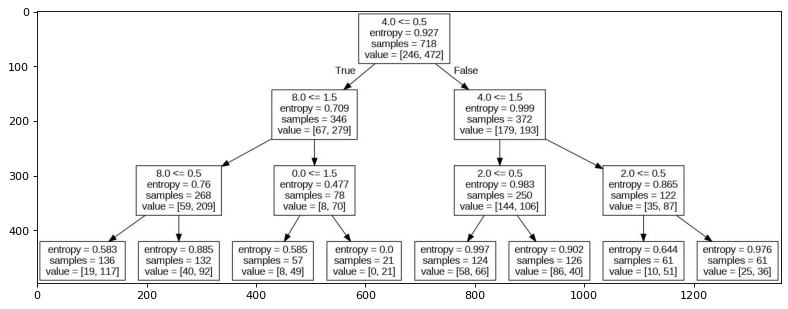

In [7]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree2,
    out_file = ("./decision_tree.dot"),
    feature_names = features,
  )

!dot -Tjpg decision_tree.dot -o decision_tree.jpg
dec_tree_img = plt.imread('./decision_tree.jpg')
plt.figure(num = None, figsize = (12, 8), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.imshow(dec_tree_img)

In [8]:
# entropy

def entropy(y) :
  unique_classes, class_counts = np.unique(y, return_counts = True)
  class_probabilities = class_counts / len(y)
  result = -np.sum(class_probabilities * np.log2(class_probabilities))
  return result

In [9]:
entropy(y_train)

0.9273023073436055

In [10]:
# information gain

def information_gain(X, y, feature_index, threshold) :

  left = X[:, feature_index] < threshold
  right = ~left

  left_entropy = entropy(y[left])
  right_entropy = entropy(y[right])

  total_entropy = entropy(y)

  result = total_entropy - (len(y[left]) / len(y) * left_entropy) - (len(y[right]) / len(y) * right_entropy)
  return result

In [14]:
# best att

def find_best_split(X, y, features) :
  best_information_gain = 0
  best_split_feature = None

  for feature_index in features :
    feature_index = int(feature_index)
    unique_values = np.unique(X[:, feature_index])
    for threshold in unique_values :
      ig = information_gain(X, y, feature_index, threshold)
      if ig > best_information_gain :
        best_information_gain = ig
        best_split_feature = feature_index

  return best_split_feature

In [15]:
# find Best Att

result = find_best_split(x_train, y_train, features)

In [16]:
print("Best Att " + str(result))

Best Att 4
